In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('transactions-sample.csv')

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

In [0]:
df['amount'] = df['purchaseamount']*df['purchasequantity']

In [0]:
for zzz in list(df.columns):
    print(str(df[zzz].nunique())+"\t= unique values for "+ zzz)

5	= unique values for id
2	= unique values for chain
82	= unique values for dept
661	= unique values for category
1355	= unique values for company
1805	= unique values for brand
462	= unique values for date
653	= unique values for productsize
6	= unique values for productmeasure
24	= unique values for purchasequantity
1514	= unique values for purchaseamount
16	= unique values for month
1907	= unique values for amount


In [0]:
df.groupby('id')['purchaseamount'].sum()

id
86246       52828.12
86252       53592.90
12262064     4118.18
12277270     8085.44
12332190     3587.71
Name: purchaseamount, dtype: float64

In [0]:
df.groupby('category')['purchaseamount'].sum().sort_values(ascending=False).head(10)

category
9753    9970.04
6401    9259.91
907     2898.80
6315    2550.65
4509    2278.29
8101    2055.72
6408    1907.53
3303    1696.42
9908    1585.10
5620    1564.04
Name: purchaseamount, dtype: float64

In [0]:
p1 = df['id'] == 86246
p2 = df['id'] == 86252
p3 = df['id'] == 12262064
p4 = df['id'] == 12277270
p5 = df['id'] == 12332190
x0 = df['category'] == 9753
x1 = df['category'] == 6401
x2 = df['category'] == 907
x3 = df['category'] == 6315
x4 = df['category'] == 4509
x5 = df['category'] == 8101
x6 = df['category'] == 6408
x7 = df['category'] == 3303
x8 = df['category'] == 9908
x9 = df['category'] == 5620

In [0]:
df1 = df[x0 & (p5 | p1 |p2|p3|p4)]
df2 = df[x1 & (p5 | p1 |p2|p3|p4)]
df3 = df[x2 & (p5 | p1 |p2|p3|p4)]
df4 = df[x3 & (p5 | p1 |p2|p3|p4)]
df5 = df[x4 & (p5 | p1 |p2|p3|p4)]
df6 = df[x5 & (p5 | p1 |p2|p3|p4)]
df7 = df[x6 & (p5 | p1 |p2|p3|p4)]
df8 = df[x7 & (p5 | p1 |p2|p3|p4)]
df9 = df[x8 & (p5 | p1 |p2|p3|p4)]
df10 = df[x9 & (p5 | p1 |p2|p3|p4)]

<BarContainer object of 5 artists>

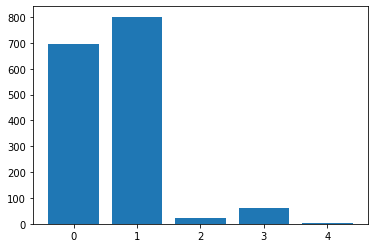

In [0]:
plt.bar(range(5),df9.groupby('id')['purchaseamount'].sum().head())

In [0]:
num1 = np.array(df1.groupby('id')['purchaseamount'].sum().head())
num2 = np.array(df2.groupby('id')['purchaseamount'].sum().head())
num3 = np.array(df3.groupby('id')['purchaseamount'].sum().head())
num4 = np.array(df4.groupby('id')['purchaseamount'].sum().head())
num5 = np.array(df9.groupby('id')['purchaseamount'].sum().head())
tot = num1 + num2 + num3 + num4 + num5
c = []
for i in [num1 , num2,  num3 , num4 , num5]:
    c.append(i/tot*100)

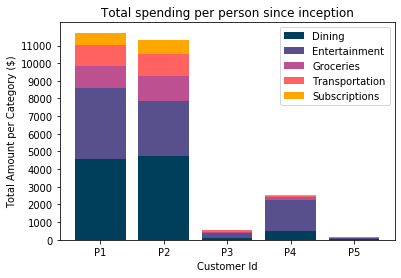

In [0]:
pl1 = plt.bar(range(5),num1, color="#003f5c")
pl2 = plt.bar(range(5),num2, bottom=num1, color="#58508d")
pl3 = plt.bar(range(5),num3, bottom=(num1+num2), color="#bc5090")
pl4 = plt.bar(range(5),num4, bottom=(num1+num2+num3), color="#ff6361")
pl5 = plt.bar(range(5),num5, bottom=(num1+num2+num3+num4), color="#ffa600")

plt.ylabel("Total Amount per Category ($)")
plt.xlabel("Customer Id")
plt.title("Total spending per person since inception")
plt.xticks(range(5), ('P1', 'P2', 'P3', 'P4', 'P5'))
plt.yticks(np.arange(0, 12000, 1000))
plt.legend((pl1[0], pl2[0],pl3[0],pl4[0],pl5[0]), ('Dining', 'Entertainment', 'Groceries', 'Transportation', 'Subscriptions'))

plt.show()

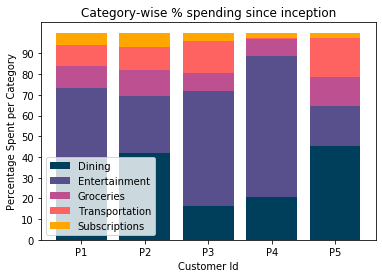

In [0]:
pl1 = plt.bar(range(5),c[0], color="#003f5c")
pl2 = plt.bar(range(5),c[1], bottom=c[0], color="#58508d")
pl3 = plt.bar(range(5),c[2], bottom=(c[0]+c[1]), color="#bc5090")
pl4 = plt.bar(range(5),c[3], bottom=(c[0]+c[1]+c[2]), color="#ff6361")
pl5 = plt.bar(range(5),c[4], bottom=(c[0]+c[1]+c[2]+c[3]), color="#ffa600")

plt.ylabel("Percentage Spent per Category")
plt.xlabel("Customer Id")
plt.title("Category-wise % spending since inception")
plt.xticks(range(5), ('P1', 'P2', 'P3', 'P4', 'P5'))
plt.yticks(np.arange(0, 100, 10))
plt.legend((pl1[0], pl2[0],pl3[0],pl4[0],pl5[0]), ('Dining', 'Entertainment', 'Groceries', 'Transportation', 'Subscriptions'))

plt.show()

In [0]:
c1 = df[p4]

In [0]:
c1.groupby('month').count()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,amount
month,,,,,,,,,,,,
2012-03,78,78,78,78,78,78,78,78,76,78,78,78
2012-04,118,118,118,118,118,118,118,118,116,118,118,118
2012-05,80,80,80,80,80,80,80,80,79,80,80,80
2012-06,95,95,95,95,95,95,95,95,93,95,95,95
2012-07,75,75,75,75,75,75,75,75,74,75,75,75
2012-08,82,82,82,82,82,82,82,82,81,82,82,82
2012-09,119,119,119,119,119,119,119,119,119,119,119,119
2012-10,99,99,99,99,99,99,99,99,98,99,99,99
2012-11,74,74,74,74,74,74,74,74,73,74,74,74


In [0]:
c1.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)

category
6401    1892.91
3307    1610.23
9753     568.42
2722     392.02
4513     313.73
3601     293.42
907      273.10
708      270.94
4509     252.78
1114     220.75
Name: amount, dtype: float64

In [0]:
cat1 = c1['category'] == 6401
cat2 = c1['category'] == 3307 
cat3 = c1['category'] == 9753 
cat4 = c1['category'] == 2722


In [0]:
per = c1['month'] > pd.to_datetime('2012-12')

In [0]:
sp = []
for i in [cat1,cat2, cat3,cat4] :
    sp.append(c1[i & per].groupby('month')['amount'].sum())

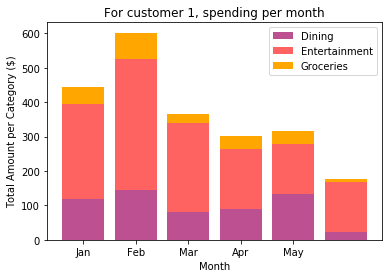

In [0]:
pl1 = plt.bar(range(6),sp[0], color="#bc5090")
pl2 = plt.bar(range(6),sp[1], bottom=sp[0], color="#ff6361")
pl3 = plt.bar(range(6),sp[2], bottom=(sp[0]+sp[1]), color="#ffa600")

plt.ylabel("Total Amount per Category ($)")
plt.xlabel("Month")
plt.title("For customer 1, spending per month")
plt.xticks(range(5), ('Jan', 'Feb', 'Mar', 'Apr', 'May'))
# plt.yticks(np.arange(0, 12000, 1000))
plt.legend((pl1[0], pl2[0],pl3[0]), ('Dining', 'Entertainment', 'Groceries'))


plt.show()